In [118]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly chart_studio
!pip install plotly
!pip install nbformat
!pip install notebook

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

%matplotlib inline

In [35]:
# random_date 함수 정의
def random_date(start, end):
    return start + timedelta(days=random.randint(0, int((end - start).days)))

# start_date, end_date 변수 설정
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 6, 30)

In [108]:
# 데이터 불러오기
review_df = pd.read_csv("dataset/tripadvisor_hotel_reviews.csv")
review_df = pd.DataFrame(review_df)

# date, 감정 컬럼 임의 추가
review_df['date'] = [random_date(start_date, end_date) for _ in range(len(review_df))]
review_df['감정'] = review_df['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')
# review_df['Rating'] = review_df['Rating'].astype(float) # review_df['Rating']을 object에서 float타입으로 변환

# 날짜별 평균 평점 계산
review_df['date'] = pd.to_datetime(review_df['date'])
daily_avg_rating = review_df.groupby('date')['Rating'].mean().reset_index()

# 날짜별 긍정 및 부정 리뷰 수 계산
review_df['date'] = pd.to_datetime(review_df['date'])
daily_sentiment = review_df.groupby(['date', '감정']).size().unstack(fill_value=0).reset_index()

# NaN 값 0으로 채우기
daily_sentiment = daily_sentiment.fillna(0)

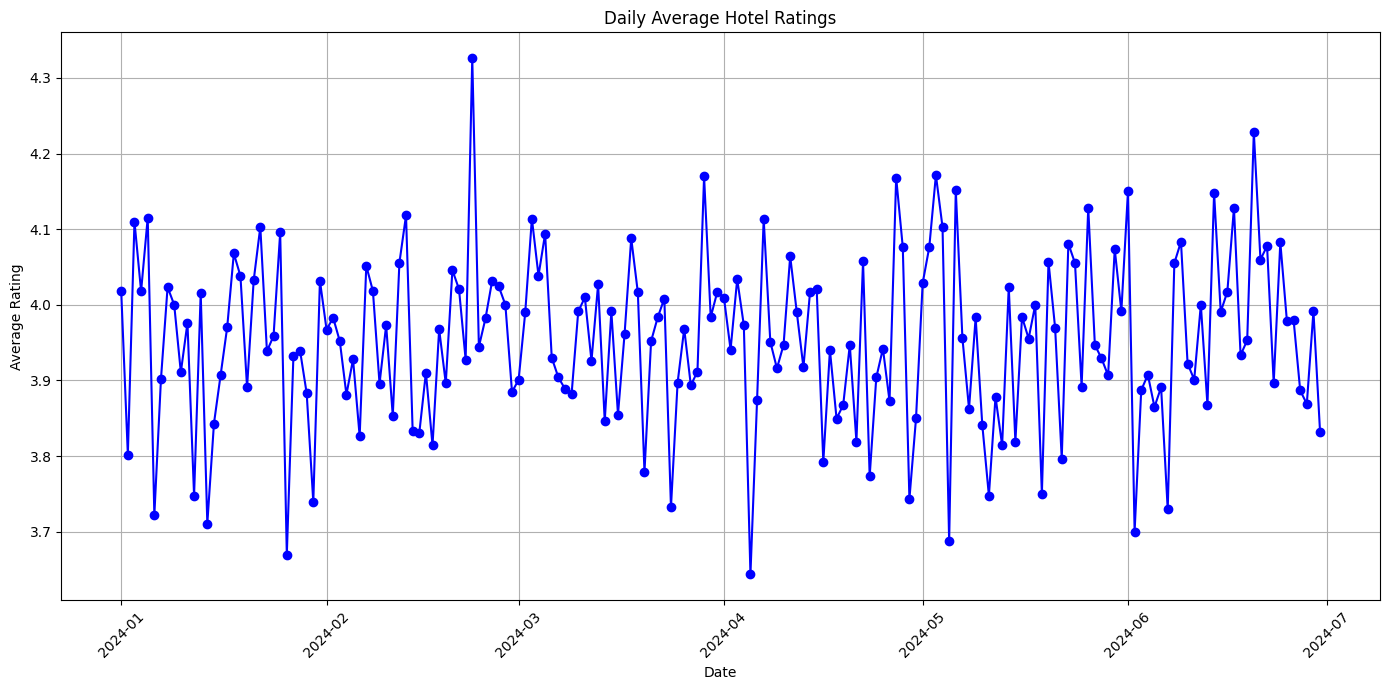

In [98]:
# 일자별 리뷰 평균 그래프화
plt.figure(figsize=(14, 7))
plt.plot(daily_avg_rating['date'], daily_avg_rating['Rating'], marker='o', linestyle='-', color='b')
plt.title('Daily Average Hotel Ratings')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

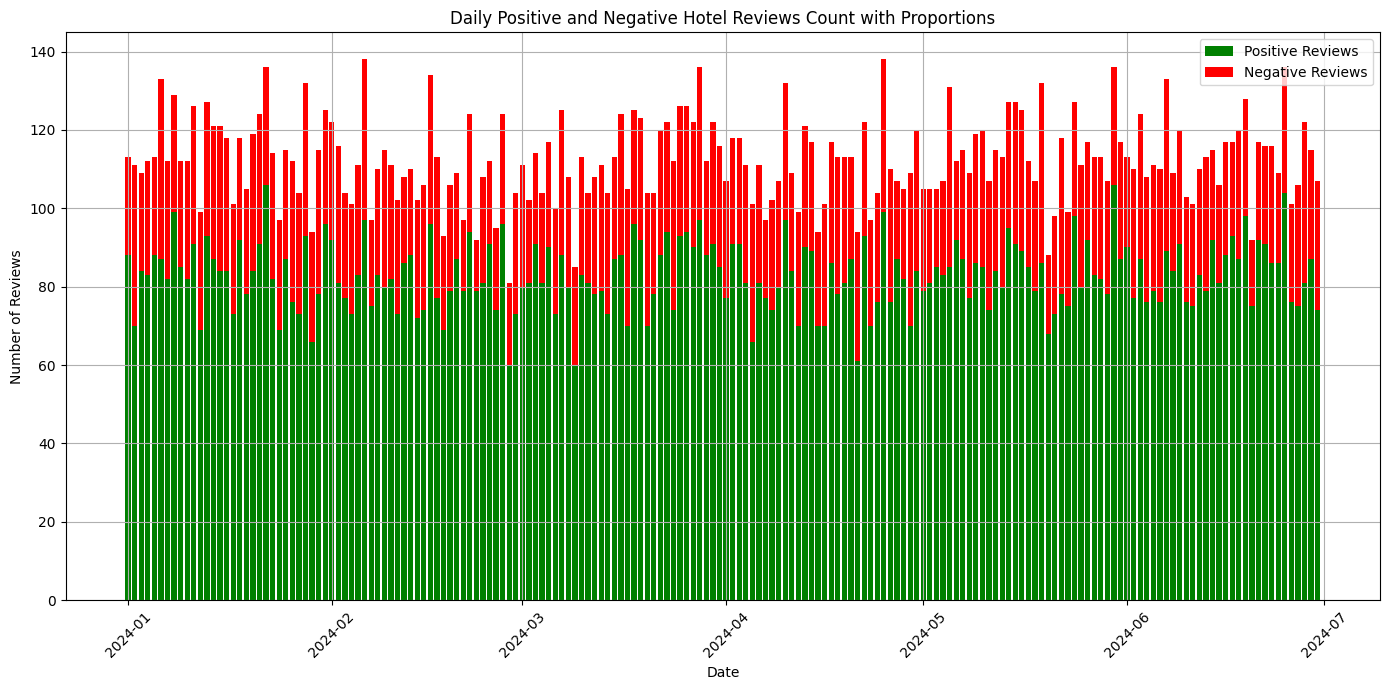

In [99]:
# 긍정 및 부정 리뷰 수를 스택된 막대 그래프로 그리기
plt.figure(figsize=(14, 7))
plt.bar(daily_sentiment['date'], daily_sentiment['Positive'], label='Positive Reviews', color='g')
plt.bar(daily_sentiment['date'], daily_sentiment['Negative'], bottom=daily_sentiment['Positive'], label='Negative Reviews', color='r')

plt.title('Daily Positive and Negative Hotel Reviews Count with Proportions')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [100]:
import chart_studio
import plotly.express as px
import plotly.graph_objects as go

username = "lingard"
apikey = "••••••••••"
chart_studio.tools.set_credentials_file(username=(username), api_key=apikey)

In [117]:
import base64